##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [27]:
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn
#%pip install scikit-learn
#%pip install xgboost
#%pip install joblib



# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME

SyntaxError: invalid syntax (<ipython-input-27-6f72be489d1d>, line 4)

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [278]:
# Can have as many cells as you want for code
import pandas as pd
filepath = "./data/catA_train.csv"
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

# Introduction

A crucial component of corporate management is sales forecasting, as making strategic decisions and allocating resources effectively depend on being able to estimate future sales statistics. The capacity to predict sales patterns is essential in today's ever-changing corporate environment for inventory optimization, resource management, and well-informed strategic decision-making. The goal of this challenge is to create a strong predictive model that can anticipate future sales for businesses, enabling preventive actions and enhanced overall performance.

In line with Champions Group's mission and vision to enable global growth and set benchmarks for quality and value in their offerings, our group's aimed to develop a robust predictive model for domestic ultimate sales. This model aims to serve as a strategic tool, aligning with Champion Group's commitment to growing customer revenue across every sector.

By precisely predicting domestic sales, the model aims to provide Champions Group with valuable insights to enhance decision-making in hopes to actively contribute to the fulfillment of Champions Group's mission and vision for global growth.


# 1) Data Preparation

## 1.1) Data Loading and Understanding

In [279]:
df=pd.read_csv(filepath)
df_orig = df
# get information about our data
print(df.info())
print(df.shape)
print(df.columns)
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  int64  
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  int64  
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

## 1.2) Data Cleaning

In [280]:
# Drop columns

df = df.drop(columns=['AccountID', 'Parent Company', '8-Digit SIC Code', '8-Digit SIC Description', 'Square Footage', 'Company Status (Active/Inactive)', 'Fiscal Year End', 'Global Ultimate Company', 'Domestic Ultimate Company'])

**Reason for excluding columns:**

**AccountID, Parent Company, Global Ultimate Company, Domestic Ultimate Company:**
These columns are likely identifiers or textual descriptions, which may not directly contribute to predicting sales. Including them may introduce unnecessary complexity to the model without providing meaningful insights into sales patterns. Hence they are dropped as we feel that it does not help woth predicting the target variable.

**8-Digit SIC Code, 8-Digit SIC Description:**
Dropped as we feel that the categorization is too specific and may lead to overfitting of the model.

**Fiscal Year End**: Column is excluded from the dataset for predicting sales because the specific date marking the end of a company's fiscal year is not expected to have a direct influence on its future sales performance.

**Square footage:**
Dropped as there are no values in the column.

**Company Status (Active/Inactive):**
Dropped as there is only one value ('Active') in the column.




In [281]:
# Number of null values in each column
print(df.isna().sum())


LATITUDE                                 120
LONGITUDE                                120
Company                                    0
SIC Code                                   0
Industry                                   0
Year Found                               434
Entity Type                                0
Parent Country                           520
Ownership Type                             0
Company Description                        0
Employees (Single Site)                12403
Employees (Domestic Ultimate Total)       79
Employees (Global Ultimate Total)       2774
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   22569
Global Ultimate Country                  523
Is Domestic Ultimate                       0
Is Global Ultimate                         0
dtype: int64


**Decision to drop rows:** with null values in specific columns is based on a threshold of 1000 null values. The columns ['LATITUDE', 'LONGITUDE', 'Year Found', 'Parent Country', 'Global Ultimate Country', 'Employees (Domestic Ultimate Total)'] have less than 1000 null values each. Since the total number of rows with null values in any of these columns is 1133, which is only 3.9% of the overall dataset, it has been decided to remove these rows. This approach helps maintain data quality and ensures that the impact on the dataset due to the removal of these rows is relatively minimal.

In [282]:
# removes rows with null values in these columns ['LATITUDE', 'LONGTITUDE', 'Year Found', 'Parent Country', 'Global Ultimate Country', 'Employees (Domestic Ultimate Total)']
df = df.dropna(subset=["LATITUDE", "LONGITUDE", "Year Found", "Parent Country", "Global Ultimate Country", "Employees (Domestic Ultimate Total)"])
print(df.isna().sum())
print(df.shape)


LATITUDE                                   0
LONGITUDE                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
Year Found                                 0
Entity Type                                0
Parent Country                             0
Ownership Type                             0
Company Description                        0
Employees (Single Site)                11970
Employees (Domestic Ultimate Total)        0
Employees (Global Ultimate Total)       2656
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   21573
Global Ultimate Country                    0
Is Domestic Ultimate                       0
Is Global Ultimate                         0
dtype: int64
(28049, 19)


**The decision not to drop rows** with null values in the 'Employees (Single Site)' column is based on the observation that the number of null values in this column is 11970, constituting 42.7% of the remaining dataset. In this case, dropping rows with null values in this column would result in a significant loss of data, potentially impacting the representativeness of the dataset and the performance of the predictive model. Initially, we thought that 'Employees (Single Site)' is a subset of 'Employees (Domestic Ultimate Total)', however our analysis show otherwise.

In [283]:
df2 = df[df['Employees (Single Site)'] > df['Employees (Domestic Ultimate Total)']]
print(df2.shape)

(5485, 19)


There are 5485 rows where the number of 'Employees (Single Site)' is higher than the number of 'Employees (Domestic Ultimate Total)'. Due to the lack of information, we are unsure whether the single site is in the domestic country, so we have decided to leave the column out from our model.

In [284]:
# Drop the 'Employees (Single Site)' column
df = df.drop(columns=['Employees (Single Site)'])
print(df.shape)

(28049, 18)


For 'Employees (Global Ultimate Total),' the decision to drop rows with null values is driven by the fact that we do not know whether the null values are incomplete data or that it represents 0. Thus, we do not want to make any assumptions as it could potentially impact the model. Furthermore, there are only 2656 null values out of 28049 entries, representing 9.46% of the dataset. Thus, we have decided to drop these rows.

In [285]:
df = df.dropna(subset=["Employees (Global Ultimate Total)"])

We have decided to drop the rows with negative values in 'Sales (Domestic Ultimate Total USD)' as negative sales figures logically did not make sense and likely represent errors or inaccuracies in the data. Sales, being a measure of revenue, should inherently be non-negative.

By removing these two rows with negative sales, we are cleaning the dataset of anomalies that could potentially disrupt the modeling processes. This ensures that the predictions derived from the model are more reliable and reflective of the actual business scenarios.

In [286]:
# INGRAM MICRO (INDIA) EXPORTS PTE. LTD. and GUOLINE (SINGAPORE) PTE LTD had negative domestic sales
negative_domestic_sales = df[df['Sales (Domestic Ultimate Total USD)'] < 0]
print(negative_domestic_sales)
df = df[df['Sales (Domestic Ultimate Total USD)'] >= 0]
print(df.shape)

       LATITUDE   LONGITUDE                                 Company  SIC Code  \
4847   1.329767  103.876679  INGRAM MICRO (INDIA) EXPORTS PTE. LTD.      5045   
18462  1.326885  103.897610             GUOLINE (SINGAPORE) PTE LTD      6719   

                                                Industry  Year Found  \
4847   Computers and Computer Peripheral Equipment an...      2001.0   
18462  Offices of Holding Companies, Not Elsewhere Cl...      1993.0   

      Entity Type  Parent Country Ownership Type  \
4847   Subsidiary           India        Private   
18462  Subsidiary  United Kingdom        Private   

                                     Company Description  \
4847   Ingram Micro (India) Exports Pte. Ltd. is prim...   
18462  Guoline (Singapore) Pte Ltd is primarily engag...   

       Employees (Domestic Ultimate Total)  Employees (Global Ultimate Total)  \
4847                                   6.0                               23.0   
18462                                 1

Final number of rows: 25391;
Final number of columns: 18

## 1.3) Feature Engineering

### <u>Import/Export Status</u>

The decision to employ one-hot encoding for the 'Import/Export Status' column stems from the realization that nearly 79.6% of the remaining dataset contains null values in this specific column. Opting to discard rows with null values in this context would result in a substantial loss of data, potentially compromising the overall performance of the predictive model.

In response to this challenge, the chosen approach involves the implementation of one-hot encoding. This method entails the creation of two new binary variables, namely "Imports" and "Exports," as additional columns. These newly introduced variables are assigned values of "1" or "0" based on the original 'Import/Export Status' column. The approach ensures the preservation of valuable information encapsulated in the 'Import/Export Status' column.

In [287]:
# Create new columns for imports and exports and drop imports/export
df['Imports'] = df['Import/Export Status'].apply(lambda x: 1 if x == "Imports" or x == "Both Imports & Exports" else 0)
df['Exports'] = df['Import/Export Status'].apply(lambda x: 1 if x == "Exports" or x == "Both Imports & Exports" else 0)

### <u>SIC Code</u>

***Extracting the First 2 Digits of the SIC Code***:
The first 2 digits of the SIC code represents the 83 industry major groups. To prevent overfitting of the model as well as streamline the analysis of the Standard Industrial Classification (SIC) codes, we only extract the first two digits of each SIC code. This process involves converting the 'SIC Code' column to a string and retaining only the initial two characters.

***Category Frequency***: Categories with higher frequencies are likely to represent common industry groups, providing more meaningful insights into prevalent patterns.
Extremely low-frequency categories may not offer sufficient information for the model to learn meaningful associations. Combining such categories into a broader label ('Others') helps to prevent the model from learning specific patterns associated with infrequent SIC codes.

***Why one-hot encoding***: One-hot encoding creates binary columns for each category, providing a more suitable representation of categorical data with multiple classes. Label encoding assigns numeric labels to categories, implying ordinal relationships, which might mislead the model in the case of SIC codes where no such order exists.


In [288]:
# Extract the first 2 digit of the SIC code. Not all of the SIC codes comprise of 4 digits as some SIC codes contain only 3 digits.
# Hence the approach to 3 digit SIC codes is to add a 0 value in front of the code. (E.g. 2-digit SIC code for “751” will be “07” instead of “75”)

df['2-digit SIC Code'] = df['SIC Code'].astype(str).apply(lambda x: "0" + x if len(x) == 5 else x).apply(lambda x: x[:2])

# There are 12 '2-digit SIC code' that has value count of less than 10
pd.options.display.max_rows = 100
sic_code_freq = df['2-digit SIC Code'].value_counts()
print(sic_code_freq)

# We are combining these 12 '2-digit SIC code' to form a common label "Others"
threshold = 10
low_frequency_sic_codes = sic_code_freq[sic_code_freq <= threshold].index
df['2-digit SIC Code'] = df['2-digit SIC Code'].replace(low_frequency_sic_codes, 'Others')
print(df['2-digit SIC Code'].nunique())


# There are now 63 distinct '2-digit SIC code' and we will be doing one-hot encoding for this column
df['2-digit SIC Code Original'] = df['2-digit SIC Code']
df = pd.get_dummies(df, columns=['2-digit SIC Code'], prefix='SIC_Code')



67    8026
87    2605
50    2525
73    2458
51    1133
65     984
47     777
44     558
58     523
35     346
17     279
36     272
82     259
59     257
37     236
15     211
20     190
48     189
28     187
89     184
42     183
62     175
80     156
16     148
70     147
27     144
34     143
13     131
79     124
72     122
49     115
38     112
83      93
57      90
78      90
76      88
45      85
30      84
54      68
63      68
56      66
55      62
61      62
64      61
75      61
86      54
25      44
26      41
32      41
33      40
60      39
39      34
41      30
22      23
52      17
96      17
29      15
91      14
53      11
14      11
81      10
23       9
97       9
84       8
24       8
46       8
92       7
74       6
40       4
18       3
85       3
71       2
93       2
19       2
43       2
Name: 2-digit SIC Code, dtype: int64
61


### <u>Year Found</u>

The decision to introduce the 'Number of years in operation' feature stems from the hypothesis that a longer operational history may correlate with higher sales. This is based on our assumption that well-established businesses (i.e. business with longer years of operation) possess advantages such as brand recognition and market experience, which may potentially influence sales positively.

In [289]:
from datetime import datetime
current_year = datetime.now().year
df['Number of years in operation'] = current_year - df['Year Found']


### <u>Entity Type & Ownership Type</u>

In [290]:
# One-hot encode the 'Entity Type' and 'Ownership Type' columns
df['Entity Type Original'] = df['Entity Type']
df['Ownership Type Original'] = df['Ownership Type']
df = pd.get_dummies(df, columns=['Entity Type'], prefix='Entity_Type')
df = pd.get_dummies(df, columns=['Ownership Type'], prefix='Ownership_Type')


### <u>Predicted domestic sales based on global employees and sales</u>

The hypothesis behind the calculation of 'Predicted Sales for Domestic' is based on the idea that the distribution of a company's global sales can be estimated by the relative size of its global and domestic workforce. The hypothesis assumes that the sales generated in the domestic market are directly influenced by the proportion of employees working domestically compared to the entire global workforce.


In [291]:
df['Predicted Sales for Domestic'] = df['Sales (Global Ultimate Total USD)'] / df['Employees (Global Ultimate Total)'] * df['Employees (Domestic Ultimate Total)']

# 2) Exploratory Data Analysis

In [292]:
# import required libraries
import matplotlib.pyplot as plt

# we will need this for the color gradient representing how high the domestic sales figure is.
from matplotlib.colors import LogNorm
import seaborn as sns

## <u>Location vs Domestic Sales</u>

The first plot focuses on the top 10% of companies based on domestic sales. There don't appear to be any distinct patterns or concentrations of higher-earning companies in specific geographical areas. The scatter plot, color-coded by sales, indicates an even distribution across Singapore, suggesting that companies with higher domestic sales are spread across different locations without a clear spatial trend.


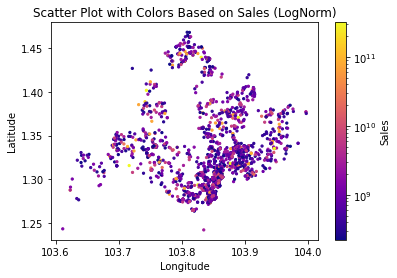

In [293]:
# Use LogNorm for more sensitivity to numerical changes
norm = LogNorm()

# Define a colormap transitioning from blue to red
cmap = 'plasma'

sales_domestic_90th_percentile = df['Sales (Domestic Ultimate Total USD)'].quantile(0.9)


df_90th = df[df['Sales (Domestic Ultimate Total USD)'] > sales_domestic_90th_percentile]


# Scatter plot with colors based on Sales values and LogNorm
scatter = plt.scatter(df_90th['LONGITUDE'], df_90th['LATITUDE'], c=df_90th['Sales (Domestic Ultimate Total USD)'], cmap=cmap, s=5, norm=norm)

# Add a colorbar
cbar = plt.colorbar(scatter, label='Sales')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Colors Based on Sales (LogNorm)') ### Help to change to more relevant title to show comparison between this and the next chart

# Show the plot
plt.show()

On the other hand, the second plot highlights the bottom 10% of companies with lower domestic sales. Similar to the first plot, there is no evident clustering or geographical pattern observed for lower-earning companies. The scatter plot again illustrates a diverse distribution of companies with lower domestic sales across Singapore.

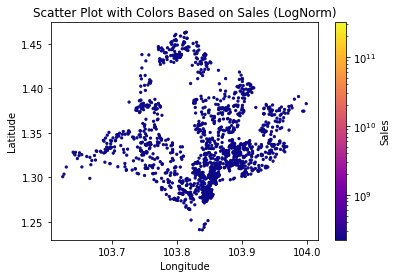

In [294]:
sales_domestic_10th_percentile = df['Sales (Domestic Ultimate Total USD)'].quantile(0.1)
df_10th = df[df['Sales (Domestic Ultimate Total USD)'] < sales_domestic_10th_percentile]
scatter = plt.scatter(df_10th['LONGITUDE'], df_10th['LATITUDE'], c=df_10th['Sales (Domestic Ultimate Total USD)'], cmap=cmap, s=5, norm=norm)
# Add a colorbar
cbar = plt.colorbar(scatter, label='Sales')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Colors Based on Sales (LogNorm)') ### Help to change to more relevant title to show comparison between this and the previous chart

# Show the plot
plt.show()


The distribution of companies, whether with lower or higher domestic sales, is not strongly correlated with specific geographical areas in Singapore. This motivates us to exclude the latitude and longitude variables from our model as we felt that their inclusion could introduce extra noise into our data, potentially leading to overfitting.

## <u>Top industries, entity type and ownership type based on average domestic sales</u>

The Petroleum Bulk stations and Terminals industry has a way higher average domestic sale as compared to the other industries.

Companies under the subsidiary entity type has the highest average domestic sale as compared to other entity types.

Meanwhile, the private companies has a slightly higher average domestic sale as compared to the public companies.

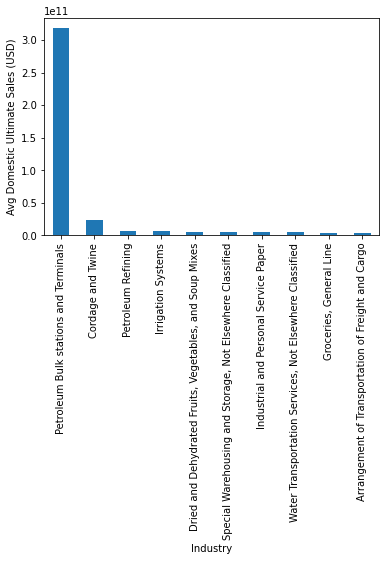

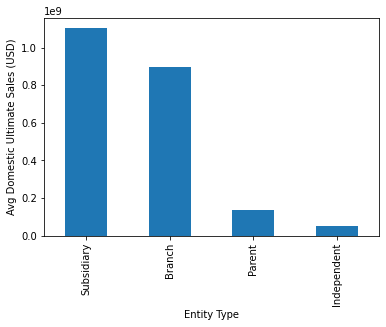

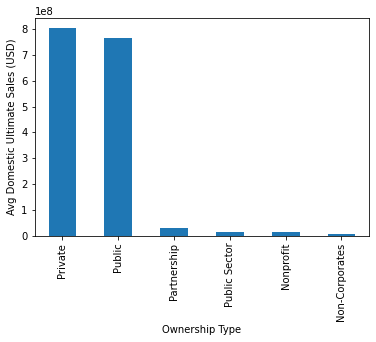

In [295]:
avg_domestic_sale_by_industry = df.groupby(['Industry'])['Sales (Domestic Ultimate Total USD)'].mean()
top_10_domestic_a = avg_domestic_sale_by_industry.sort_values(ascending=[False])[:10]
top_10_domestic_a.plot.bar()
plt.xlabel("Industry")
plt.ylabel("Avg Domestic Ultimate Sales (USD)")
plt.show()

avg_domestic_sale_by_entity_type = df.groupby(['Entity Type Original'])['Sales (Domestic Ultimate Total USD)'].mean()
top_10_domestic_b = avg_domestic_sale_by_entity_type.sort_values(ascending=[False])[:10]
top_10_domestic_b.plot.bar()
plt.xlabel("Entity Type")
plt.ylabel("Avg Domestic Ultimate Sales (USD)")
plt.show()

avg_domestic_sale_by_ownership_type = df.groupby(['Ownership Type Original'])['Sales (Domestic Ultimate Total USD)'].mean()
top_10_domestic_c = avg_domestic_sale_by_ownership_type.sort_values(ascending=[False])[:10]
top_10_domestic_c.plot.bar()
plt.xlabel("Ownership Type")
plt.ylabel("Avg Domestic Ultimate Sales (USD)")
plt.show()

## <u>Range and Distribution of response variable **'Sales (Domestic Ultimate Total USD)'**</u>

We have decided to plot a boxplot to find out how the response variable is distributed.

The boxplot reveals a highly right-skewed distribution of the response variable, 'Sales (Domestic Ultimate Total USD).' The majority of the data points are concentrated within the lower range of sales, as indicated by the compact box extending from the first quartile (Q1) to the third quartile (Q3).

The numerous number of outliers beyond the upper whisker indicates that the data is right skewed as there are a significant number of instances with exceptionally high sales values. In fact, using the 1.5 * IQR criteria, we have identified 4805 outliers (extreme values).

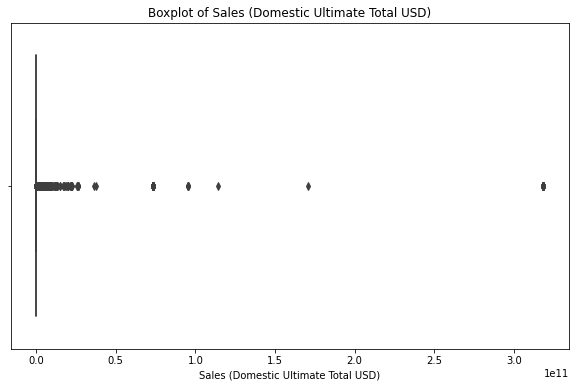

Number of outliers: 4805


In [296]:
## Boxplot of 'Sales (Domestic Ultimate Total USD)'

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales (Domestic Ultimate Total USD)', data=df)
plt.title('Boxplot of Sales (Domestic Ultimate Total USD)')
plt.show()

# OBTAINING IQR
Q1 = df['Sales (Domestic Ultimate Total USD)'].quantile(0.25)
Q3 = df['Sales (Domestic Ultimate Total USD)'].quantile(0.75)
IQR = Q3 - Q1

# UPPER AND LOWER BOUNDS
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# OBTAINING OUTLIERS
outliers = df[(df['Sales (Domestic Ultimate Total USD)'] < lower_bound) | (df['Sales (Domestic Ultimate Total USD)'] > upper_bound)]
print("Number of outliers:", outliers.shape[0])

To further investigate what the range of values our response variables take, we have binned these values and the result are as follows.

In [297]:
bins = [10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**9, 10**10, 10**11, 10**12]
groups = df.groupby(pd.cut(df['Sales (Domestic Ultimate Total USD)'], bins))
print(groups.Company.count())

Sales (Domestic Ultimate Total USD)
(1, 10]                              0
(10, 100]                            2
(100, 1000]                         15
(1000, 10000]                       20
(10000, 100000]                    180
(100000, 1000000]                 4229
(1000000, 10000000]              12144
(10000000, 100000000]             5180
(100000000, 1000000000]           2366
(1000000000, 10000000000]         1070
(10000000000, 100000000000]        159
(100000000000, 1000000000000]       26
Name: Company, dtype: int64


From above, we can see that 47.8% of the observations has a domestic ultimate sales between 1 million and 10 million USD. Binning it shows us that the log transformation might make the distribution of the response variable closer to normal distribution.

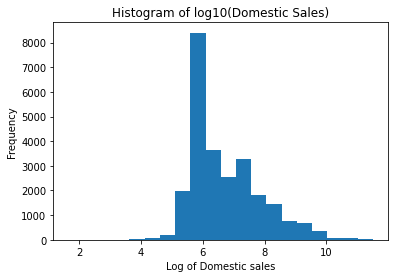

In [298]:
# Histogram of log domestic sales
import numpy as np
df['log of domestic sales'] = np.log10(df['Sales (Domestic Ultimate Total USD)'])
plt.hist(df['log of domestic sales'], bins=20)
plt.xlabel("Log of Domestic sales")
plt.ylabel("Frequency")
plt.title("Histogram of log10(Domestic Sales)")
plt.show()

The histogram now provides a clearer view of the distribution, with the log-transformed values revealing a slightly right skewed distribution, which is much closer to the normal distribution as compared to the previous distribution. Thus, we will be using the log transformed values for the model instead.

## <u> Domestic vs Global Sales </u>

There are 73.79% of rows with global ultimate sales matching their domestic ultimate sales might suggest that there is a strong alignment between a company's performance in its domestic market and its overall global performance.
This could imply that majority of these companies may not have a global presence and that their operations within their home country contribute solely to their overall sales.

In [299]:
# Percentage of rows with Global Ultimate Sales = Domestic Ultimate Sales
df2 = df[df['Sales (Domestic Ultimate Total USD)'] == df['Sales (Global Ultimate Total USD)']]
percentage = df2.shape[0]/25391 * 100
print(str(round(percentage, 2)) + '%')

73.79%


The scatter plot illustrates a concentration of data points in the lower range of 'Sales (Domestic Ultimate Total USD)' combined with a spread across both high and low values of 'Sales (Global Ultimate Total USD)'. The majority of the data points appear to cluster in a region where 'Domestic Ultimate Total' is low, and 'Global Ultimate Total' exhibits both high and low values. This concentration indicates that many companies have relatively lower domestic sales, while their global sales can vary widely.

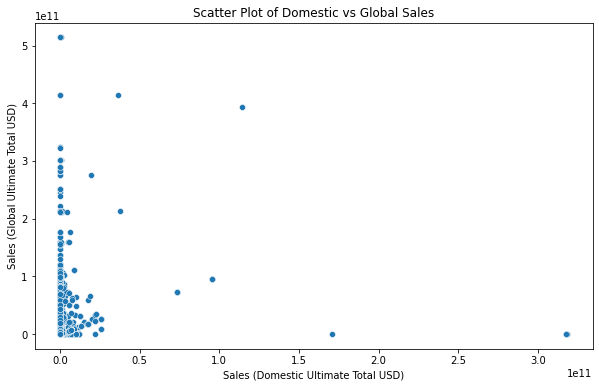

In [300]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales (Domestic Ultimate Total USD)', y='Sales (Global Ultimate Total USD)', data=df)
plt.title('Scatter Plot of Domestic vs Global Sales')
plt.xlabel('Sales (Domestic Ultimate Total USD)')
plt.ylabel('Sales (Global Ultimate Total USD)')
plt.show()

## <u>Correlation matrix of sales and employees</u>

The association between 'Sales (Global Ultimate Total USD)' and 'Employees (Global Ultimate Total)' with a correlation coefficient of 0.65 indicates a positive association. As the number of global employees increases, there is a tendency for global sales to increase as well.

However, we should also recognize that association does not imply causation. The correlation simply indicates a statistical relationship and doesn't show the underlying reasons.

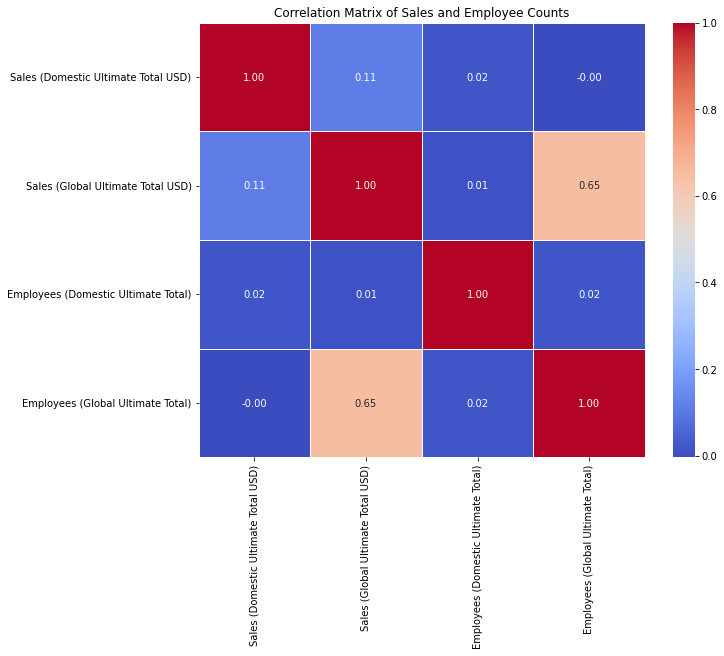

In [301]:
correlation_columns = ['Sales (Domestic Ultimate Total USD)', 'Sales (Global Ultimate Total USD)',
                        'Employees (Domestic Ultimate Total)', 'Employees (Global Ultimate Total)']
correlation_df = df[correlation_columns]
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(10, 8))

# HEATMAP
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# TITLE OF PLOT
plt.title('Correlation Matrix of Sales and Employee Counts')
plt.show()


# 3) Model Training and Evaluation

In [302]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import make_scorer, r2_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

##3.1) Feature Scaling and Selection

Feature scaling, particularly through techniques like log transformation, benefits the convergence of XGBoost by ensuring all input features are on a similar scale, aiding distance-based computations crucial for algorithms like XGBoost. This similarity in scale facilitates faster convergence, as gradient-based optimization navigates the feature space more effectively. Therefore, we have log-transformed the **'Sales (Global Ultimate Total USD)'** and **'Sales (Domestic Ultimate Total USD)'**.

The **'Entity_Type_Subsidiary'** and **'Ownership_Type_Public Sector'** is dropped to prevent perfect multicollinearity which may cause problems when fitting and interpreting the regression model.

In [303]:
# Feature scaling of the global sales column by using log transformation.
# The feature scaling of the domestic sales has already been done during EDA.
df['log of global sales'] = np.log10(df['Sales (Global Ultimate Total USD)'])

final_df = df.drop(columns=['LATITUDE', 'LONGITUDE', 'Company', 'Industry', '2-digit SIC Code Original', 'SIC Code', 'Year Found', 'Parent Country', 'Company Description', 'Sales (Domestic Ultimate Total USD)', 'Import/Export Status', 'Global Ultimate Country', 'Entity Type Original', 'Ownership Type Original', 'Entity_Type_Subsidiary', 'Ownership_Type_Public Sector'])
y_log = final_df['log of domestic sales']
X = final_df.drop(columns = ['log of domestic sales'])
# X.info()


## 3.2) Model Evaluation Metrics

In evaluating our model's performance on predicting domestic ultimate sales for the Champions Group, we decided to include R-squared (R²) and Mean Absolute Percentage Error (MAPE) to determine the performance of our model. R² provides insight into the proportion of variance explained. Additionally, MAPE offers a measure of prediction accuracy, expressed as a percentage of the true values.

We opted not to use MSE in our evaluation due to the substantial magnitude of our sales figures, reaching 10^19 after squaring. MSE could lead to an inflated assessment of errors, as it squares the differences between predicted and true values. This decision ensures that our evaluation metrics are better aligned with the scale of our response variable, providing a more meaningful representation of prediction accuracy.


## 3.3) Model Selection

### 3.3.1) <u>Rejected Model: Principal Component Regression</u>

The first model we considered is a Principal Component Regression (PCR). This is because the dataset has a high dimensionality (81 columns) and doing a PCR will prevent the model from overfitting as we are only selecting the top 10 principal components.
However, after evaluating the model performance, we realised that PCR only works well with linear relationships as it assumes that the relationship between the predictors and the response variable is linear. If the relationship is non-linear, which is the case currently, PCR may not be able to accurately capture it, thus leading to high R-squared and mean absolute percentage error.

Therefore, we have decided to consider a non-linear regression method, XGBoost.

In [304]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)
scaler = StandardScaler()
# Fit and transform the scaler on the training data
X_train_std = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test_std = scaler.transform(X_test)
# Apply PCA to reduce dimensionality
n_components = 10  # Choose the number of principal components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Initialize a linear regression model
regressor = LinearRegression()

# Train the model on the reduced feature space
regressor.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test_pca)

# Evaluate the model
r2_test = r2_score(10**y_test, 10**y_pred)
mape = mean_absolute_percentage_error(10**y_test, 10**y_pred)
print(f'R-squared: {r2_test}')
print("Mean absolute percentage error:", round(mape, 2), "%")

R-squared: -125555.5979398332
Mean absolute percentage error: 119.78 %


**Results of PC Regression:**

**R-squared**: -5632.715893904566

**Mean absolute percentage error**: 110.09 %

### 3.3.2) <u>Final Model: XGBoost Regression</u>

XGBoost is chosen for this scenario due to its effectiveness in handling complex relationships and non-linear patterns within the data. Since it is particularly suitable for regression tasks, we decided to choose this model for predicting domestic sales.
In this regression problem of predicting 'Sales (Domestic Ultimate Total USD),' XGBoost can effectively capture intricate patterns and dependencies in the features, providing predictions. Our testing, through cross-validation, gives us confidence that XGBoost can handle the ups and downs of different situations, making it the ideal for our sales predictions. XGBoost is also known for being one of the best machine learning algorithm for tabular data.

#### Hyperparameter tuning and number of folds for cross validation

Number of folds used for k-fold cross validation: 11 (R-squared stop increasing after 11 folds)

Hyperparameter for XGBoost model: {'alpha': 1, 'lambda': 3, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}


In [305]:
# The parameter grid for hyperparameter tuning (commented out to cut down the model training time)
'''
param_grid = {

    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.6, 0.5],
    'lambda': [1, 2, 3],
    'alpha': [0, 1, 2]
}


# Create an R-squared scorer for GridSearchCV
r2_scorer = make_scorer(r2_score)

# Perform GridSearchCV with k-fold cross-validation on standardized data
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=r2_scorer, cv=5, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
'''

# Use the best hyperparameters to train the final model on standardized data
grid = {'alpha': 1, 'lambda': 3, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
final_model = XGBRegressor(objective='reg:squaredlogerror', random_state=42)
final_model.set_params(**grid)

# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Iterate over different numbers of folds
for n_folds in n_folds_values:
    # Use k-fold cross-validation with the current number of folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Perform cross-validation and get R-squared scores
    cv_scores = cross_val_score(final_model, X_train, y_train, cv=kf, scoring='r2')

    # Append mean and standard deviation of R-squared scores to lists
    mean_r2_scores.append(cv_scores.mean())
    std_r2_scores.append(cv_scores.std())

# Plot the results
plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
plt.legend()
plt.show()

"\nfor n_folds in n_folds_values:\n    # Use k-fold cross-validation with the current number of folds\n    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)\n\n    # Perform cross-validation and get R-squared scores\n    cv_scores = cross_val_score(final_model, X_train, y_train, cv=kf, scoring='r2')\n\n    # Append mean and standard deviation of R-squared scores to lists\n    mean_r2_scores.append(cv_scores.mean())\n    std_r2_scores.append(cv_scores.std())\n\n# Plot the results\nplt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')\nplt.xlabel('Number of Folds')\nplt.ylabel('R-squared Score')\nplt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')\nplt.legend()\nplt.show()\n"

#### Model Fitting and Model Prediction

In [306]:
# Use k-fold cross-validation with 11 folds since it has the highest R-squared scores
kf = KFold(n_splits=11, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(final_model, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
final_model.fit(X_train, y_train)
print(X_train.info())

# Evaluate the model on the test set
y_pred_log = final_model.predict(X_test)
r2_test = r2_score(10**y_test, 10**y_pred_log)
mape = mean_absolute_percentage_error(10**y_test, 10**y_pred_log)
print("R-squared on Test Set:", r2_test)
print("Mean absolute percentage error", round(mape, 2), "%")

Cross-Validation R-squared scores: [0.78935161 0.76437751 0.77881641 0.72791858 0.79448028 0.801578
 0.7735654  0.79930798 0.76356614 0.76272078 0.81392321]
Mean R-squared score: 0.7790550829698496
Standard Deviation of R-squared scores: 0.023050313805619196
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20312 entries, 24183 to 27193
Data columns (total 79 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Employees (Domestic Ultimate Total)  20312 non-null  float64
 1   Employees (Global Ultimate Total)    20312 non-null  float64
 2   Sales (Global Ultimate Total USD)    20312 non-null  float64
 3   Is Domestic Ultimate                 20312 non-null  int64  
 4   Is Global Ultimate                   20312 non-null  int64  
 5   Imports                              20312 non-null  int64  
 6   Exports                              20312 non-null  int64  
 7   SIC_Code_13                  

**Results of XGBoost Regression:**

**Cross-Validation R-squared scores**: [0.79087361 0.76435836 0.77981974 0.72665006 0.78975673 0.80029566 0.77255925 0.79919882 0.76024608 0.75763874 0.81394176]

**Mean R-squared score**: 0.778

**Standard Deviation of R-squared scores**: 0.0236

**R-squared on Test Set**: 0.0797

**Mean absolute percentage error**: 56.07 %

## 3.4) Comparison between the PC Regression and XGBoost Regression models

The R-squared value for PCR is negative (-5632.716) and the mean absolute percentage error is 56.07%, indicating poor model fit, while XGBoost demonstrates a more reasonable R-squared value and a lower mean absolute percentage error. The XGBoost model consistently demonstrated superior performance, with a mean R-squared score of 0.778, a minimal standard deviation of 0.0236, and a R-squared on the test set (0.0797), coupled with a manageable mean absolute percentage error of 56.07%.

XGBoost, which is more versatile in handling various situations, is a superior choice for predicting 'Sales (Domestic Ultimate Total USD)' based on the presented results above.

However, the low R-squared on the test set may indicate that the XGBoost model has overfitted on the training set. One possible improvement would be to expand the grid search when tuning the hyperparameters. Another possible improvement would be to use dimensionality reduction methods to reduce the number of features before fitting the model.



# Conclusion

In the pursuit of predicting 'Sales (Domestic Ultimate Total USD),' we embarked on a thorough exploration of various modeling techniques, seeking the optimal approach for our dataset. Initially considering Principal Component Regression (PCR) to tackle the high dimensionality, we encountered significant limitations due to its linear assumption, leading to unsatisfactory results with a negative R-squared value and high mean absolute percentage error.

Undeterred, we transitioned to the formidable XGBoost Regression model, renowned for its ability to handle complex relationships and non-linear patterns. The extensive evaluation, involving hyperparameter tuning and k-fold cross-validation, showcased the model's robustness and versatility. Based on the results we have obtained, the XGBoost regression model emerged as our best choice, surpassing PCR.

By embracing XGBoost, we strive to empower Champions Group with a reliable predictive tool, aligning with their mission and vision of enabling global growth.


## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list).
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

#### PLEASE RUN THE CODE FROM THE VERY FIRST CELL AS THE FUNCTION "testing_hidden_data" DIRECTLY RELY ON THE MODEL TRAINED ABOVE. IT USES THE 'final_model' GLOBAL VARIABLE TO TEST THE DATA.

In [307]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform.

All relevant code MUST be included in this function.'''
    df = hidden_data
    ## Data Cleaning
    df = df.drop(columns=['Employees (Single Site)','AccountID', 'Parent Company', '8-Digit SIC Code', '8-Digit SIC Description', 'Square Footage', 'Company Status (Active/Inactive)',
                     'Fiscal Year End', 'Global Ultimate Company', 'Domestic Ultimate Company'])
    df = df.dropna(subset=["LATITUDE", "LONGITUDE", "Year Found", "Parent Country", "Global Ultimate Country", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)"])
    df = df[df['Sales (Domestic Ultimate Total USD)'] >= 0]

    ## Featyre Engineering
    df['Imports'] = df['Import/Export Status'].apply(lambda x: 1 if x == "Imports" or x == "Both Imports & Exports" else 0)
    df['Exports'] = df['Import/Export Status'].apply(lambda x: 1 if x == "Exports" or x == "Both Imports & Exports" else 0)
    df['2-digit SIC Code'] = df['SIC Code'].astype(str).apply(lambda x: "0" + x if len(x) == 5 else x).apply(lambda x: x[:2])
    threshold = 10
    low_frequency_sic_codes = sic_code_freq[sic_code_freq <= threshold].index
    df['2-digit SIC Code'] = df['2-digit SIC Code'].replace(low_frequency_sic_codes, 'Others')
    df = pd.get_dummies(df, columns=['2-digit SIC Code'], prefix='SIC_Code')
    current_year = datetime.now().year
    df['Number of years in operation'] = current_year - df['Year Found']
    df = pd.get_dummies(df, columns=['Entity Type'], prefix='Entity_Type')
    df = pd.get_dummies(df, columns=['Ownership Type'], prefix='Ownership_Type')
    df['Predicted Sales for Domestic'] = df['Sales (Global Ultimate Total USD)'] / df['Employees (Global Ultimate Total)'] * df['Employees (Domestic Ultimate Total)']
    df['log of domestic sales'] = np.log10(df['Sales (Domestic Ultimate Total USD)'])
    df['log of global sales'] = np.log10(df['Sales (Global Ultimate Total USD)'])
    final_df = df.drop(columns=['LATITUDE', 'LONGITUDE', 'Company', 'Industry', 'SIC Code', 'Year Found', 'Parent Country', 'Company Description', 'Sales (Domestic Ultimate Total USD)', 'Import/Export Status', 'Global Ultimate Country', 'Entity_Type_Subsidiary', 'Ownership_Type_Public Sector'])
    y_log = final_df['log of domestic sales']
    X = final_df.drop(columns = ['log of domestic sales'])

    ## Model Fitting (Since we log transformed our target variable, the output of the model must be transformed back to its original scale. )
    y_pred_log = final_model.predict(X)
    y_pred = 10**y_pred_log
    result = y_pred.tolist()
    return result

print(testing_hidden_data(df_orig))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25391 entries, 1 to 29181
Data columns (total 79 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Employees (Domestic Ultimate Total)  25391 non-null  float64
 1   Employees (Global Ultimate Total)    25391 non-null  float64
 2   Sales (Global Ultimate Total USD)    25391 non-null  float64
 3   Is Domestic Ultimate                 25391 non-null  int64  
 4   Is Global Ultimate                   25391 non-null  int64  
 5   Imports                              25391 non-null  int64  
 6   Exports                              25391 non-null  int64  
 7   SIC_Code_13                          25391 non-null  uint8  
 8   SIC_Code_14                          25391 non-null  uint8  
 9   SIC_Code_15                          25391 non-null  uint8  
 10  SIC_Code_16                          25391 non-null  uint8  
 11  SIC_Code_17                 

In [308]:
import joblib

# Save the base model to an HDF5 file
joblib.dump(final_model, 'base_model.h5')

def test_model(data):
    # we assume the data is cleaned
    # To load the model in the future
    loaded_model = joblib.load('./base_model.h5')
    predictions = loaded_model.predict(data)
    predictions = 10 ** (predictions)
    return predictions

# Extract the last row of the test set
last_row = X_test.iloc[[1]]

# Make predictions on the last row
print(test_model(last_row))

[3643251.]


##### Cell to check testing_hidden_data function

In [309]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
print(testing_hidden_data(test_df))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25391 entries, 1 to 29181
Data columns (total 79 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Employees (Domestic Ultimate Total)  25391 non-null  float64
 1   Employees (Global Ultimate Total)    25391 non-null  float64
 2   Sales (Global Ultimate Total USD)    25391 non-null  float64
 3   Is Domestic Ultimate                 25391 non-null  int64  
 4   Is Global Ultimate                   25391 non-null  int64  
 5   Imports                              25391 non-null  int64  
 6   Exports                              25391 non-null  int64  
 7   SIC_Code_13                          25391 non-null  uint8  
 8   SIC_Code_14                          25391 non-null  uint8  
 9   SIC_Code_15                          25391 non-null  uint8  
 10  SIC_Code_16                          25391 non-null  uint8  
 11  SIC_Code_17                 

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!